# PixelFilterBaseClass

A class for filtering pixels. To "delete" a pixel, set the alpha channel to zero, which other modules may interpret as the pixel being deleted.

In [1]:
import margo_loader
from utils.ImageFiles import read_img

In [2]:
from utils.Formatting import flattish

In [3]:
from abc import ABC, abstractmethod
import numpy as np

In [4]:
class PixelFilterBaseClass(ABC):
    
    @abstractmethod
    def filter_pixel(self, rgb):
        raise Exception("Not implemented")
        
    def filter_image(self, img):
        
        """ 
        Filter an image by removing pixels where filter_pixel(p) returns False
        """
        
        pixels = flattish(img)
        
        pixels = [self.filter_pixel(x) for x in pixels]
        return np.uint8(np.array(pixels).reshape(img.shape[0], img.shape[1], 4))


# Demo

The DoNothingFilter returns rgb pixels without modification.

The DropRedsFilter deletes an pixels with red values > 0.

In [5]:
# :: ignore-cell ::
class DoNothingFilter(PixelFilterBaseClass):
    
    def filter_pixel(self, rgb):
        return rgb


In [6]:
# :: ignore-cell ::
class DropRedsFilter(PixelFilterBaseClass):
    
    def filter_pixel(self, rgb):
        r, g, b, a = rgb
        return (r,g,b,r)

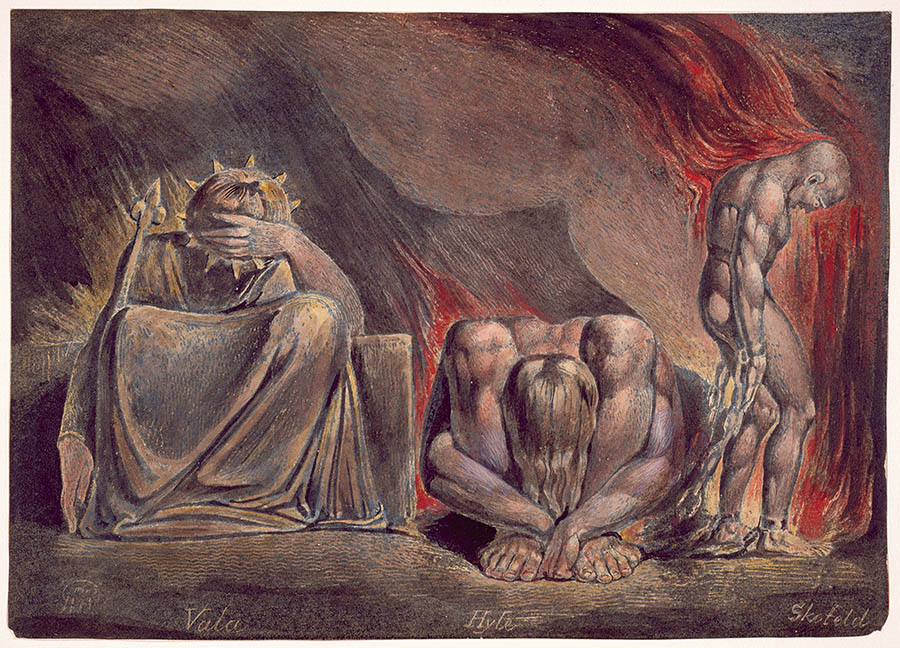

In [7]:
# :: ignore-cell ::

import cv2
from PIL import Image
dnf = DoNothingFilter()
Image.fromarray(dnf.filter_image(cv2.cvtColor(cv2.imread("../images/jerusalem.mpi.p22-51.100.jpg"), cv2.COLOR_BGR2RGBA)))

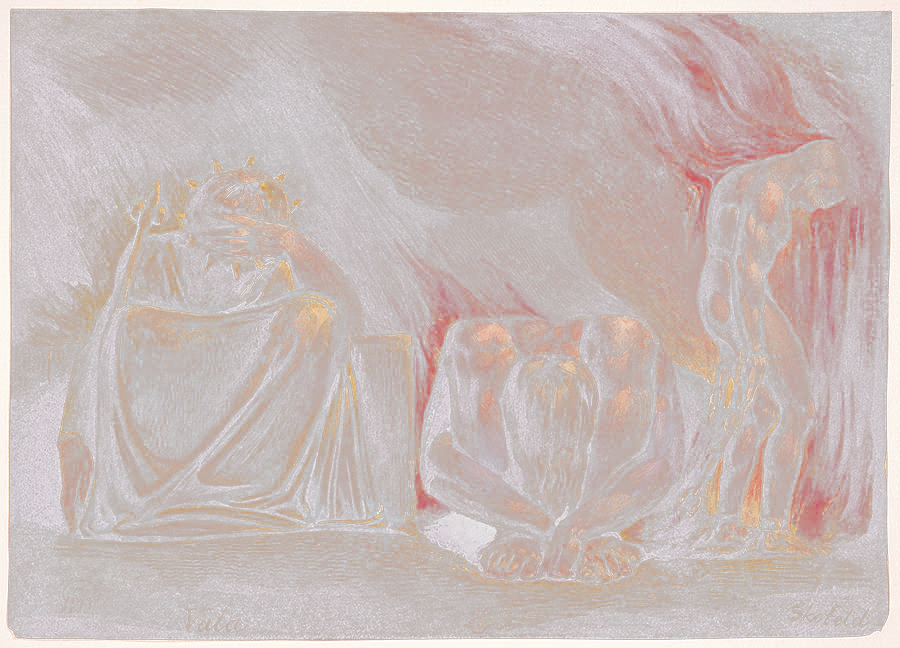

In [8]:
# :: ignore-cell ::
drf = DropRedsFilter()
Image.fromarray(drf.filter_image(cv2.cvtColor(cv2.imread("../images/jerusalem.mpi.p22-51.100.jpg"), cv2.COLOR_BGR2RGBA)))

# Performance testing


In [9]:
# :: ignore-cell ::
# Time the performance with multiprocessing, the default behavior for PixelFilter.filter_image

%timeit -n 5 -r 1 dnf.filter_image(read_img("../images/jerusalem.mpi.p22-51.100.jpg", scale=0.5))

102 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [10]:
# :: ignore-cell ::
%timeit -n 5 -r 1 dnf.filter_image(read_img("../images/jerusalem.mpi.p22-51.100.jpg", scale=1))

382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
